# 4. Web Scraping - Scrapy

<img src='https://xn--kvin-duranty-beb.fr/wp-content/uploads/2022/10/Web-Scraping-_-IPSSI-PRS-3.png'>

Dans cet exercice, nous utiliserons la bibliothèque scrapy afin de collecter les données des sites internet suivants :

- Partie 1 : [AlloCiné](https://www.allocine.fr/film/meilleurs)
Nous collecterons les informations des meilleurs films recensés par la platforme.


- Partie 2 : [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)
Nous collecterons les données boursières des entreprises du CAC40.


# Parie 1 - Les meilleurs films selon [Allociné.fr](https://www.allocine.fr/film/meilleurs/)

<img src= 'https://fr.web.img2.acsta.net/newsv7/15/10/19/21/14/237930.jpg'>

L'objectif de cet exercice est de collecter les données des meilleurs films présents sur la page `https://www.allocine.fr/film/meilleurs/` du site allocine.fr.

Les données que nous collecterons seront les suivantes :
- Les titres du film
- Les liens des images
- Les noms des auteurs
- Les durées des films
- Les genres cinématographiques 
- Les scores des films
- Les descriptions des films
- Les dates de sortie des films

## 4.1 Installez scrapy à l'aide de la commande suivante :


`pip install scrapy`


## 4.2 Générez un environement de travail scrapy en executant la commande suivante :

In [1]:
# Création du dossier WebCrawler contenant l'ensemble des fichiers utiles au fonctionnement de scrapy
!scrapy startproject WebCrawler

Error: scrapy.cfg already exists in C:\Users\lahou\Documents\IPSSI\WebScraping\WebCrawler


In [2]:
# Création du projet AlloCiné dans le dossier WebCrawler/spider
!cd WebCrawler && scrapy genspider allocine https://www.allocine.fr/film/meilleurs

Traceback (most recent call last):
  File "C:\Users\lahou\anaconda3\lib\site-packages\mysql\connector\connection_cext.py", line 263, in _open_connection
    self._cmysql.connect(**cnx_kwargs)
_mysql_connector.MySQLInterfaceError: Can't connect to MySQL server on 'localhost:3306' (10061)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\lahou\anaconda3\Scripts\scrapy-script.py", line 10, in <module>
    sys.exit(execute())
  File "C:\Users\lahou\anaconda3\lib\site-packages\scrapy\cmdline.py", line 144, in execute
    cmd.crawler_process = CrawlerProcess(settings)
  File "C:\Users\lahou\anaconda3\lib\site-packages\scrapy\crawler.py", line 290, in __init__
    super().__init__(settings)
  File "C:\Users\lahou\anaconda3\lib\site-packages\scrapy\crawler.py", line 167, in __init__
    self.spider_loader = self._get_spider_loader(settings)
  File "C:\Users\lahou\anaconda3\lib\site-packages\scrapy\crawler.py", line 161, i

Les fichiers de scrapy que nous manipulerons seront :

1. le fichier `items.py` qui contient les champs que nous souhaitons collecter (ex : nom des films, score, date de publication). Chaque champs sera introduit dans la class `ReviewsAllocineItem` avec la nomenclature suivante : `name = scrapy.Field()`.


2. le fichier `allocine.py` qui contient les fonctions qui permetons la collecte.

## 4.3 Ajoutez dans le fichier `items.py` les champs que nous souhaitons collecter.

Ajoutez dans la class `ReviewsAllocineItem(scrapy.Item)` les champs suivants,
pour rappel la nomenclature des champs est la suivante : 

`name = scrapy.Field()`.

- title
- img
- author
- time
- genre
- score
- desc
- release

In [3]:
#À ajouter au fichier items.py
class ReviewsAllocineItem(scrapy.Item):
     pass

NameError: name 'scrapy' is not defined

## 4.3 Lancez votre terminal puis exécutez la commande suivante :

C'est dans le terminale que nous intéragirons avec scrapy pour manipuler les bases du site allocine.fr

`scrapy shell`

`url = 'https://www.allocine.fr/film/meilleurs'`

`fetch(url)`

## 4.4 Exécutez dans votre terminal les commandes suivantes et notez vos observations.

Repérez en parallèle à quelles balises correspondent vos résultats.

`response`

`response.css('a')`

`len(response.css('a'))`

`response.css('a::text')`

`response.css('a')[0].attrib`

`response.css('a')[0].attrib['href']`

`response.css('a::text')[0].extract()`

`response.css('h1.item')`

`response.css('h1.item::text')`

`response.css('h1.item::text')[0].extract()`

`response.css('img')`

## 4.5 Recherchez les informations suivantes sous forme de chaine de caractère (str) :

0. La balise qui liste l'ensemble des films
1. Le titre du premier film
2. Le lien de l'image du premier film
3. Le nom de l'auteur du premier film
4. La durée du premier film 
5. Le genre cinématographique du premier film
6. Le score du premier film
7. La description du premier film
8. La date de sortie du premier film

In [4]:
# 0. La balise qui liste l'ensemble des films
response.css('li.mdl')

#1. Le titre du premier film
response.css('li.mdl')[0].css('a.meta-title-link::text').extract()

#2. Le lien de l'image du premier film
response.css('li.mdl')[0].css('img.thumbnail-img').attrib['src']

#3. Le nom de l'auteur du premier film
response.css('li.mdl')[0].css('a.blue-link::text').extract()

#4. La durée du premier film 
response.css('li.mdl')[0].css('div.meta-body-item.meta-body-info::text')[0].extract()

#5. Le genre cinématographique du premier film
response.css('li.mdl')[0].css('div.meta-body-item.meta-body-info')[0].css('span::text')[1:].extract()

#6. Le score du premier film
response.css('li.mdl')[0].css('span.stareval-note::text')[:-1].extract()

#7. La description du premier film
response.css('li.mdl')[0].css('div.content-txt::text').extract()

#8. La date de sortie du premier film
response.css('li.mdl')[0].css('span.date::text').extract()


NameError: name 'response' is not defined

## 4.6 Complétez le code suivante en fonction des résultats obtenus à la question précédentes

In [1]:
import scrapy
from scrapy import Request
from WebCrawler.items import ReviewsAllocineItem


class AllocineSpider(scrapy.Spider):
    name = 'allocine'
    allowed_domains = ['www.allocine.fr']
    
    #Liste des pages à collecter
    start_urls = [f'https://www.allocine.fr/film/meilleurs/?page={n}' for n in range(1,10)]


    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_manga)
        
        
    def parse_manga(self, response):
        liste_film = response.css('li.mdl')
        
        
        # Boucle qui parcours l'ensemble des éléments de la liste des films
        for film in liste_film:
            item = ReviewsAllocineItem()

            # Nom du film
            try:
                item['title'] = film.css('a.meta-title-link::text').extract()
            except:
                item['title'] = 'None'
              
            # Lien de l'image du film
            try:
                item['img'] = film.css('img.thumbnail-img').attrib['src']
            except:
                item['img'] = 'None'


            # Auteur du film
            try:
                item['author'] = film.css('a.blue-link::text').extract()
            except:
                item['author'] = 'None'
           
            # Durée du film
            try:
                item['time'] = str(film.css('div.meta-body-item.meta-body-info::text')[0].get()).strip()
            except:
                item['time'] = 'None'

            # Genre cinématographique
            try:
                item['genre'] = film.css('div.meta-body-item.meta-body-info')[0].css('span::text')[1:].extract()
            except:
                 item['genre'] = 'None'

            # Score du film
            try:
                item['score'] = film.css('span.stareval-note::text')[:-1].extract()
            except:
                item['score'] = 'None'

            # Description du film
            try:
                item['desc'] = str(film.css('div.content-txt::text').get()).strip()
            except:
                item['desc'] = 'None'

            # Date de sortie
            try:
                item['release'] = str(film.css('span.date::text').get()).strip()
            except:
                item['release'] = 'None'


            yield item


ModuleNotFoundError: No module named 'WebCrawler.items'

## 4.7 Ajoutez l'ensemble de votre code au fichier `allocine.py` se trouvant dans le dossier `spider`, exécutant la commande suivante afin d'obtenir le fichier `allocine.csv` contenant les données collectées.

In [ ]:
!cd WebCrawler/WebCrawler/spiders && scrapy crawl allocine -o allocine.csv

## 4.7 Importez la bibliothèque Pandas puis visualisez votre collecte de données

In [10]:
import pandas as pd

df = pd.read_csv(r'C:\Users\lahou\Documents\IPSSI\WebScraping\WebCrawler\WebCrawler\spiders\allocine.csv', encoding='utf-8')
df

,author,desc,genre,img,release,score,time,title
0,Christopher Nolan,"Au lieu de subtiliser un rêve, un voleur expér...","Science Fiction,Thriller",https://fr.web.img6.acsta.net/c_310_420/medias...,12 août 2020,"4,1,4,5",2h 28min,Inception
1,Masaki Kobayashi,"Japon, 17ème siècle. Le samouraï Tsugumo vient...",Drame,https://fr.web.img6.acsta.net/c_310_420/medias...,13 août 2008,"4,6,4,4",2h 13min,Harakiri
2,Martin Scorsese,1954. Teddy Daniels et Chuck Aule enquêtent su...,Thriller,https://fr.web.img2.acsta.net/c_310_420/medias...,None,"3,8,4,4",2h 17min,Shutter Island
3,Quentin Tarantino,L'odyssée sanglante et burlesque de petits mal...,"Policier,Thriller",https://fr.web.img2.acsta.net/c_310_420/medias...,None,"4,4,4,5",2h 29min,Pulp Fiction
4,Sergio Leone,Un mystérieux desperado pourchasse sans relâch...,Western,https://fr.web.img3.acsta.net/c_310_420/pictur...,10 octobre 2018,"4,0,4,5",2h 55min,Il était une fois dans l'Ouest
...,...,...,...,...,...,...,...,...
85,Milos Forman,Rebellion dans un hôpital psychiatrique à l'in...,Drame,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",16 septembre 2009,"5,0,4,5",2h 09min,Vol au-dessus d'un nid de coucou
86,Christopher Nolan,Batman entreprend de démanteler les dernières ...,"Action,Thriller","data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",None,"4,0,4,5",2h 32min,"The Dark Knight, Le Chevalier Noir"
87,Gérard Oury,"En 1942, un avion anglais est abattu par les A...",Comédie,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",13 juillet 2016,"3,8,4,3",2h 12min,La Grande Vadrouille
88,Stanley Kubrick,"Écrivain, Jack Torrance est engagé comme gardi...","Epouvante-horreur,Thriller","data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",22 mai 2019,"4,0,4,3",2h 23min,Shining


# Partie 2 - Cotations boursières du CAC40 - [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)


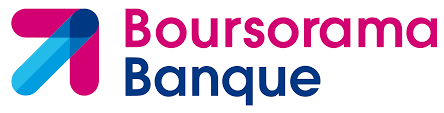



L'objectif de cet exercice sera de collecter les données en temps réelle des actions du CAC40.
Les données que nous collecterons serons :

- le nom de l'indice boursier
- le cours de l'action
- la variation de l'action
- la valeur la plus haute de la séance
- la valeur la plus basse
- la valeur d'ouverture
- la date et l'heure de la collecte


## Lancez le projet scrapy

Créez le projet scrapy nomé `boursorama` en utilisant le lien suivant `https://www.boursorama.com/bourse/actions/palmares/france/page-1`.

Pour rappel la commande scrapy pour génére un nouveau spider est la suivante : 

`scrapy genspider nom_du_projet adresse_url`

In [ ]:
!cd WebCrawler && scrapy genspider (nom_du_projet::à compléter) (url_du_projet::à compléter)

## Modifiez le fichier items.py en ajoutant les champs à collecter

Ajoutez une class `ReviewsBoursoramaItem(scrapy.Item)` puis les champs avec la nomenclature `name = scrapy.Field()`

## Lancez le shell scrapy

`scrapy shell`

`url = 'https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC'`

`fetch(url)`

## Compléter le code suivant puis ajoutez-le au fichier `boursorama.py`.

In [ ]:
import scrapy
from scrapy import Request
from WebCrawler.items import #Importe la class contenant vos items (champs collectés) ==> à compléter
import time

class BoursoramaSpider(scrapy.Spider):
    name = 'boursorama'
    allowed_domains = ['finance.yahoo.com']
    start_urls = #[Liste des URL à compléter]

    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_boursorama)
            
    def parse_boursorama(self, response):
        liste_indices = response.css('tr.c-table__row')[1:]
        
        for indices in liste_indices:
            item = #importer la class Items du projet provenant du fichier items.py
            
            #indice boursier
            try: 
              item['indice'] = #à compléter
            except:
              item['indice'] = 'None'
            
            #indice cours de l'action
            try: 
              item['cours'] = #à compléter
            except:item['cours'] = 'None'
            
            #Variation de l'action
            try: 
              item['var'] = #à compléter
            except:
              item['var'] = 'None'
            
            #Valeur la plus haute
            try: 
              item['hight'] = #à compléter
            except:
              item['hight'] = 'None'
            
            #Valeur la plus basse
            try: 
              item['low'] = #à compléter
            except:
              item['low'] = 'None'

            #Valeur d'ouverture
            try: 
              item['open_'] = #à compléter
            except:
              item['open_'] = 'None'

            #Date de la collecte
            try: 
              item['time'] = #à compléter
            except:
              item['time'] = 'None'

            
            yield item

## Executez la commande suivante afin de collecter vos données

In [ ]:
!cd WebCrawler/WebCrawler/spiders && scrapy crawl (nom_du_projet::à compléter) -o (nom_du_fichier_csv::à compléter)

# Bonus - [MyAnimeListe](https://myanimelist.net/manga.php?letter=A)

<img src='https://image.myanimelist.net/ui/OK6W_koKDTOqqqLDbIoPArR89MP-ulHxaLCJ2P-BfXg'>

Reproduisez l'ensemble de la procédure en collectant les données du site [MyAnimeListe](https://myanimelist.net/manga.php?letter=A).

Les données à collecter : 
- le nom des animés
- l'image des animés
- la description des animés.

Utilisez la class `DataBase` pour stoquer vos donneés dans une base de données.

In [ ]:
import sqlalchemy as db

class DataBase():
    def __init__(self, name_database='database'):
        self.name = name_database
        self.url = f"sqlite:///{name_database}.db"
        self.engine = db.create_engine(self.url)
        self.connection = self.engine.connect()
        self.metadata = db.MetaData()
        self.table = self.engine.table_names()
       
    
    def create_table(self, name_table, **kwargs):
        colums = [db.Column(k, v, primary_key = True) if 'id_' in k else db.Column(k, v) for k,v in kwargs.items()]
        db.Table(name_table, self.metadata, *colums)
        self.metadata.create_all(self.engine)
        print(f"Table : '{name_table}' are created succesfully")
        
    def read_table(self, name_table, return_keys=False):
        table = db.Table(name_table, self.metadata, autoload=True, autoload_with=self.engine)
        if return_keys:table.columns.keys() 
        else : return table
        
        
    def add_row(self, name_table, **kwarrgs):
        name_table = self.read_table(name_table)
        
        stmt = (
            db.insert(name_table).
            values(kwarrgs)
        )
        self.connection.execute(stmt)
        print(f'Row id added')
        
        
    def delete_row_by_id(self, table, id_):
        name_table = self.read_table(name_table) 
        
        stmt = (
            db.delete(name_table).
            where(students.c.id_ == id_)
            )
        self.connection.execute(stmt)
        print(f'Row id {id_} deleted')
        
    def select_table(self, name_table):
        name_table = self.read_table(name_table)       
        stm = db.select([name_table])
        return self.connection.execute(stm).fetchall()

In [ ]:
#Générer un projet scrapy
!cd WebCrawler && scrapy genspider manga https://myanimelist.net/manga.php?letter=A
    
# Collecter les données
!cd WebCrawler/WebCrawler/spiders && scrapy crawl (nom_du_projet::à compléter) -o (nom_du_fichier_CSV::à compléter)